In [ ]:
# Prepare data for Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# a. Load Dataset 'Iris (5).csv'
dataset = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/Iris%20(5).csv', encoding='ISO-8859-1')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# b. Drop unwanted columns that will not contribute to the prediction of 'Species'
dataset.drop(columns=['Id'], inplace=True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# c. There are missing 'Species' data in the dataset with 'NaN' at index 150 to 157

# Calculate the mean features for each existing species
mean_features_by_species = dataset.groupby('Species').mean()
print("Mean features by existing Species:\n", mean_features_by_species)
missing_rows_features = dataset.loc[150:157, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
print("\nFeatures of missing 'Species' rows (150-157):\n", missing_rows_features)

# Impute missing 'Species' based on the closest mean features
for index in range(150, 158):
    row_features = dataset.loc[index, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

    # Calculate Euclidean distance to the mean of each species
    distances = {}
    for species, mean_values in mean_features_by_species.iterrows():
        distance = np.linalg.norm(row_features.values - mean_values.values)
        distances[species] = distance

    # Find the species with the minimum distance
    closest_species = min(distances, key=distances.get)
    dataset.at[index, 'Species'] = closest_species
    print(f"Index {index}: Assigned '{closest_species}' based on closest mean features.")

print("\nDataset after imputing missing 'Species' values:\n", dataset.tail(10))

Mean features by existing Species:
                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026

Features of missing 'Species' rows (150-157):
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
150            5.6           2.9            4.2           1.3
151            7.1           3.2            6.0           1.8
152            4.6           2.3            1.3           0.3
153            7.5           3.0            6.6           2.1
154            5.7           3.0            4.2           1.2
155            5.5           3.4            1.5           0.4
156            4.7           3.0            1.4           0.3
157            7.6           3.0            6.1   

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.83      0.91        18

       accuracy                           0.94        48
      macro avg       0.94      0.94      0.94        48
   weighted avg       0.95      0.94      0.94        48



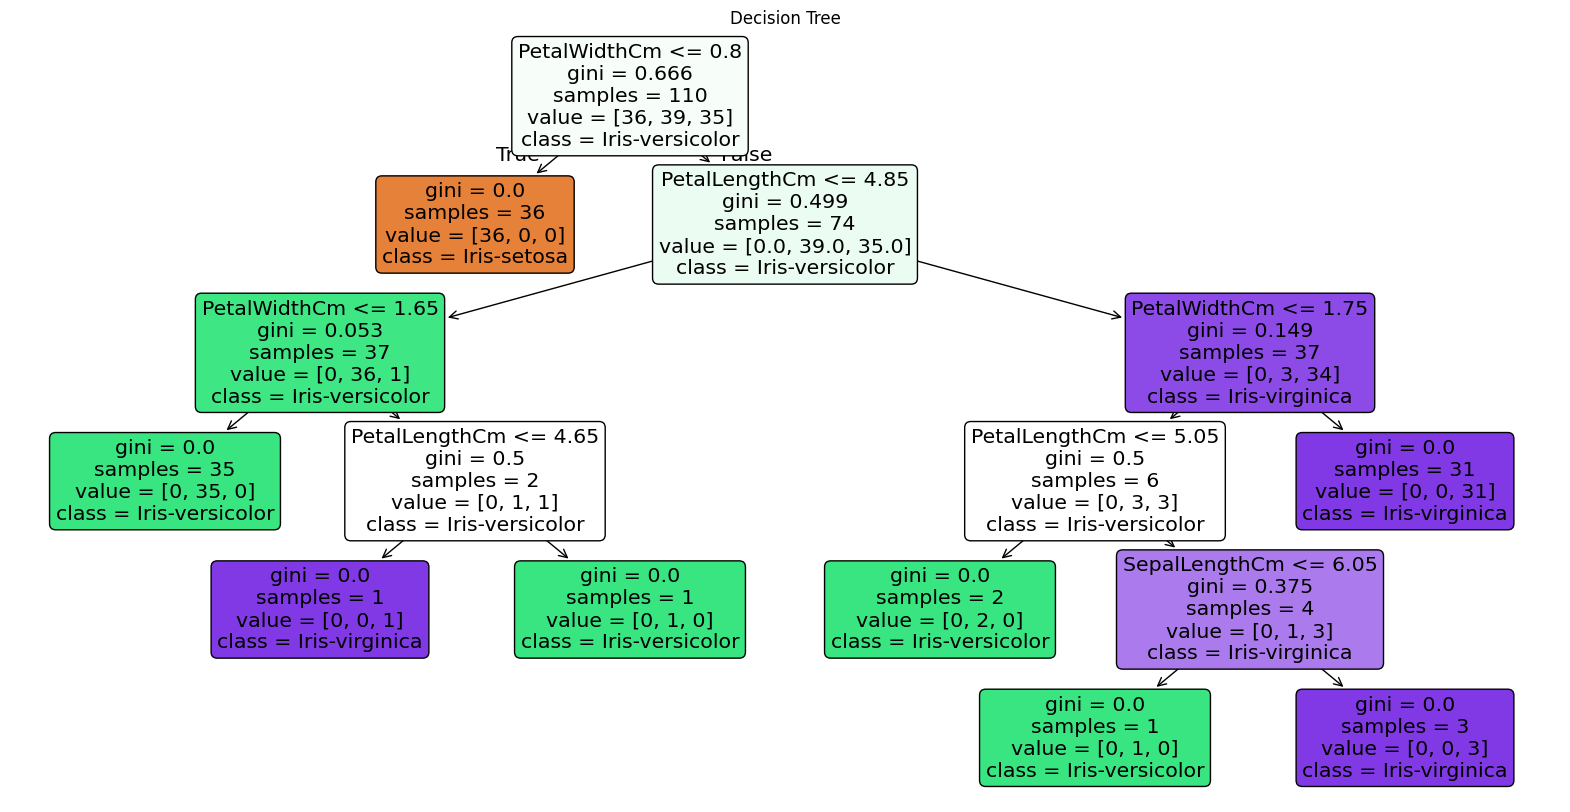

In [ ]:
# Separate features (X) and target (y)
X = dataset.drop('Species', axis=1)
y = dataset['Species']

# d. Where applicable, use random_state = 50 for the model itself and for train_test_split
# e. Test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=50)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Generate classification report for Question 1
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot the Decision Tree (optional, but good for visualization)
# Q1
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=dt_model.classes_, rounded=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
# Q2
sample_1 = np.array([[4.95, 2.9, 1.3, 0.1]])
predicted_species_1 = dt_model.predict(sample_1)
print(f"Predicted Species for [4.95, 2.9, 1.3, 0.1]: {predicted_species_1[0]}")

Predicted Species for [4.95, 2.9, 1.3, 0.1]: Iris-setosa


In [ ]:
# Q3
sample_2 = np.array([[2.45, 3.9, 2.5, 0.2]])
predicted_species_2 = dt_model.predict(sample_2)
print(f"Predicted Species for [2.45, 3.9, 2.5, 0.2]: {predicted_species_2[0]}")

Predicted Species for [2.45, 3.9, 2.5, 0.2]: Iris-setosa


In [ ]:
# Q4
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                importance
PetalWidthCm     0.543613
PetalLengthCm    0.435911
SepalLengthCm    0.020477
SepalWidthCm     0.000000


In [ ]:
# Q5
num_terminal_nodes = dt_model.get_n_leaves()
print(f"\nNumber of terminal nodes (leaves): {num_terminal_nodes}")


Number of terminal nodes (leaves): 8
